## Importing Standard Libraries

In [1]:
# Importing standard libraries

import pandas as pd
import numpy as np

from sklearn import preprocessing
import sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
from matplotlib import pyplot as plt

## Importing Data 

In [2]:
pd.__version__

'1.0.1'

In [3]:
df_train = pd.read_csv("train.csv", error_bad_lines=False)
df_test = pd.read_csv("test.csv")

In [4]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

## Pre - Processing Data 

In [6]:
df_train['state'] = df_train['state'].astype('category')
df_train['area_code'] = df_train['area_code'].astype('category')
df_train['international_plan'] = df_train['international_plan'].astype('category')
df_train['voice_mail_plan'] = df_train['voice_mail_plan'].astype('category')

churn
no     85.93
yes    14.07
dtype: float64


Text(0, 0.5, 'Frequency')

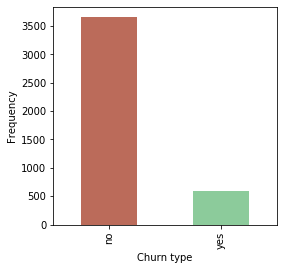

In [7]:
# Each category within the churn column has the following frequency in percentage terms:
print(round((df_train.groupby(['churn']).size()/len(df_train)*100),2))

churn_plot = df_train['churn'].value_counts(sort = True, ascending = False).plot(kind = 'bar',figsize = (4,4), color = ['#BB6B5A','#8CCB9B'])
churn_plot.set_xlabel('Churn type')
churn_plot.set_ylabel('Frequency')

In [8]:
# Defining the categorical columns:

categoricalColumns = ['state','area_code','international_plan','voice_mail_plan']
categorical_ix = df_train.select_dtypes(include=['object', 'bool']).columns

print("Categorical columns:")
print(categoricalColumns)

onehotCategorical = preprocessing.OneHotEncoder(handle_unknown = 'ignore',categories='auto',sparse = False)

categorical_transformer = Pipeline(steps = [('onehot', onehotCategorical)])

Categorical columns:
['state', 'area_code', 'international_plan', 'voice_mail_plan']


In [9]:
# Showing categorical data type
df_train.loc[:,categoricalColumns].dtypes

state                 category
area_code             category
international_plan    category
voice_mail_plan       category
dtype: object

Let us see how the categorical variable values are present in the data.

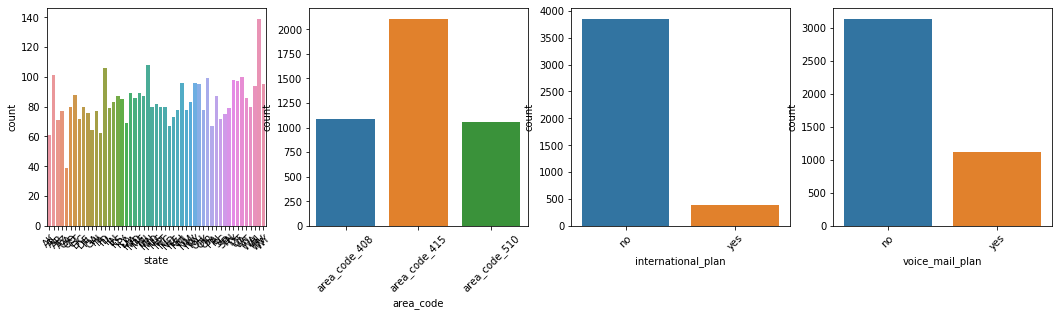

In [10]:
import seaborn as sns
fig, ax = plt.subplots(1, 4, figsize=(18, 4))
for variable, subplot in zip(categoricalColumns, ax.flatten()):
    sns.countplot(df_train[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

In [11]:
# Let's find out the correlation between categorical variables and the target variable
# Skipping the state variable bacause it contains too many states as visible above.
cols = ['area_code','international_plan','voice_mail_plan']
df_categorical = df_train.loc[:,cols]
df_categorical['churn'] = df_train['churn']

df_categorical['churn'].replace(to_replace='yes', value=1, inplace=True)
df_categorical['churn'].replace(to_replace='no',  value=0, inplace=True)

df_categorical.head()

,area_code,international_plan,voice_mail_plan,churn
0,area_code_415,no,yes,0
1,area_code_415,no,no,0
2,area_code_408,yes,no,0
3,area_code_415,yes,no,0
4,area_code_510,no,yes,0


In [12]:
df_dummies = pd.get_dummies(df_categorical,prefix=['area_code', 'international_plan','voice_mail_plan'])
df_dummies['churn'] = df_categorical['churn']

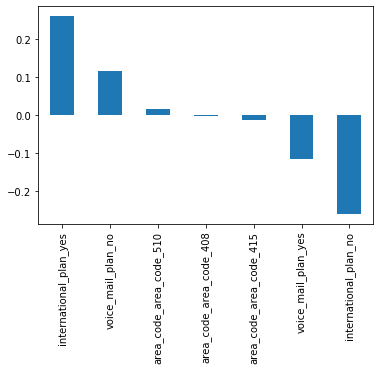

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 6,4 
df_dummies.corr()['churn'].sort_values(ascending = False)[1:].plot(kind='bar')

In [14]:
# Defining the numerical columns:

numericalColumns = df_train.select_dtypes(include=[np.float,np.int]).columns

print("Numerical columns: ")
print(numericalColumns)

scaler_numerical = StandardScaler()

numerical_transformer = Pipeline(steps = [('scale',scaler_numerical)])

Numerical columns: 
Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')


In [15]:
# Showing numerical data type
df_train.loc[:,numericalColumns.values].dtypes

account_length                     int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
dtype: object

Let us see correlation plot between the numerical variables.

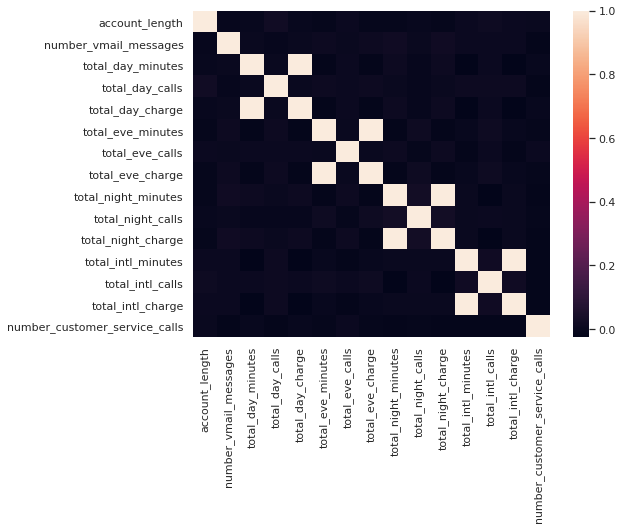

In [16]:
corrMatrix = df_train.corr()

sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(corrMatrix)
plt.show()

In [17]:
# Let's find out the correlation between numerical variables and the target variable
df_numerical = df_train.loc[:,numericalColumns.values]
df_numerical['churn'] = df_train['churn']

df_numerical['churn'].replace(to_replace='yes', value=1, inplace=True)
df_numerical['churn'].replace(to_replace='no',  value=0, inplace=True)

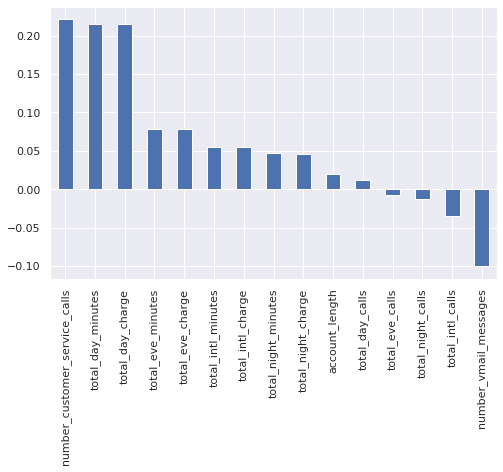

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,5 
df_numerical.corr()['churn'].sort_values(ascending = False)[1:].plot(kind='bar')

In [19]:
# Preprocessing

preproc = ColumnTransformer(transformers=[('cat',categorical_transformer,categoricalColumns),
                                          ('num',numerical_transformer,numericalColumns)],
                                          remainder = "passthrough")

df_churn_pd = preproc.fit_transform(df_train)
print(df_churn_pd)

[[0.0 0.0 0.0 ... 1.2485912365478966 -0.42634612724537485 'no']
 [0.0 0.0 0.0 ... 0.698341682382157 -1.1889602016531369 'no']
 [0.0 0.0 0.0 ... -1.3281871634477609 0.3362679471623873 'no']
 ...
 [0.0 0.0 0.0 ... -1.220821396781275 -0.42634612724537485 'no']
 [0.0 0.0 0.0 ... -0.13374300928310742 0.3362679471623873 'no']
 [0.0 0.0 0.0 ... -0.3484745426160791 -1.1889602016531369 'no']]


In [20]:
features = []
features = df_train.drop(['churn'],axis=1)
#features = pd.DataFrame(df_churn_pd).iloc[:,:-1]

labebl_churn = pd.DataFrame(df_train,columns = ['churn'])
label_encoder = LabelEncoder()
label = df_train['churn']

label = label_encoder.fit_transform(label)
print("Encoded values of churn after LabelEncoding: "  + str(label))

Encoded values of churn after LabelEncoding: [0 0 0 ... 0 0 0]


In [21]:
from collections import Counter
Counter(label)

Counter({0: 3652, 1: 598})

## Train - Test Split 

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.33, random_state=42)

print("Training Input shape: " + str(X_train.shape))
print("Training Output shape: " + str(y_train.shape))

print("Training Input shape: " + str(X_test.shape))
print("Training Input shape: " + str(y_test.shape))

Training Input shape: (2847, 19)
Training Output shape: (2847,)
Training Input shape: (1403, 19)
Training Input shape: (1403,)


## Random Forest Model

In [23]:
from sklearn.ensemble import RandomForestClassifier

model_name= "Random Forest Classifier"
randomForestClassifier = RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = 0)

In [24]:
rfc_model = Pipeline(steps = [('preprocessor',preproc),('classifier',randomForestClassifier)])

In [25]:
rfc_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['state', 'area_code',
                                                   'international_plan',
                                                   'voice_mail_plan']),
                                                 ('num',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       '

In [26]:
y_pred_rfc = rfc_model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# View accuracy score
rf = round(accuracy_score(y_test, y_pred_rfc),2)*100
print(str(rf)+'%')

# View confusion matrix for test data and predictions
print(confusion_matrix(y_test, y_pred_rfc))

# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_rfc))

93.0%
[[1191    0]
 [  93  119]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1191
           1       1.00      0.56      0.72       212

    accuracy                           0.93      1403
   macro avg       0.96      0.78      0.84      1403
weighted avg       0.94      0.93      0.93      1403



In [28]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rfc)
print('Area Under the curve',metrics.auc(fpr, tpr))

Area Under the curve 0.7806603773584906


Now we are going to predict on our test data.

In [29]:
df_test_id = df_test.iloc[:,0]

df_test_data = df_test.iloc[:,1:]
df_test_data.columns = list(X_test.columns)

test_pred_rfc = rfc_model.predict(df_test_data)

final = pd.DataFrame(df_test_id.copy())

final['pred'] = pd.Series(test_pred_rfc)

mapping = {0:'no',1:'yes'}
final['churn'] = final['pred'].map(mapping)
final.drop(['pred'],axis=1,inplace = True)

final.to_csv(str(model_name)+'.csv',index=False)

### Feature Importance 

There are two types of feature importances that can be calculated in case of random forest model. Impurity based feature importance and permutation based feature importance.

As we have one hot encoded the categorical columns, we have increased the number of features in our data from 19 to 79, and this will give a distorted understanding of feature importances of the variables. 

Furthermore, impurity-based importances are computed on training set statistics and therefore do not reflect the ability of feature to be useful to make predictions that generalize to the test set.

Hence, we will use permutation_importance method.

The permutation_importance method will be permuting categorical columns before they get one-hot encoded.

In [30]:
from sklearn.inspection import permutation_importance

In [31]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 5

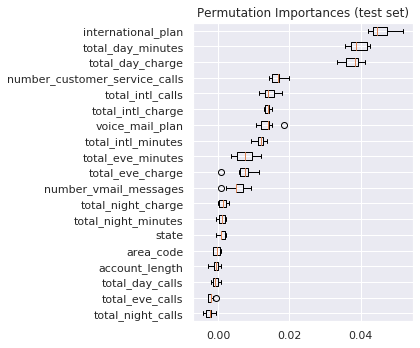

In [32]:
result = permutation_importance(rfc_model, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

From the above plot, we can see that the variables international_plan, total_day_minutes, number_customer_service_calls and voice_mail_plan have high importance in building the model. In other words, these variables are affecting the target outcome.

To see this, let us build plots to understand their relationship with the target variable.

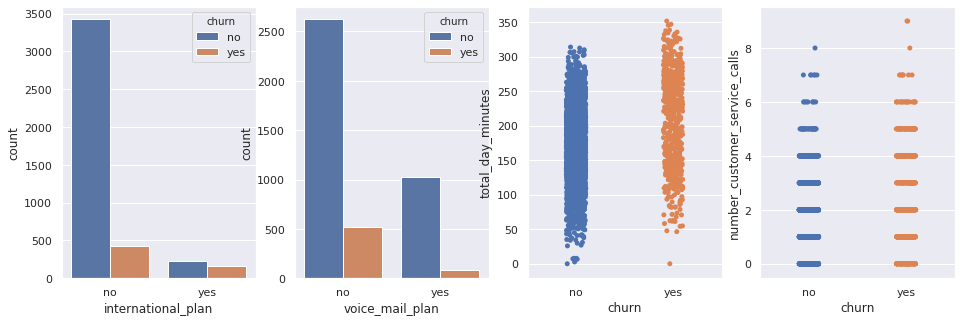

In [33]:
sns.set(rc={'figure.figsize':(16,5)})

fig, axs = plt.subplots(ncols=4)
sns.countplot(x="international_plan", hue="churn", data=df_train, ax=axs[0])
sns.countplot(x="voice_mail_plan", hue="churn", data=df_train, ax=axs[1])
sns.stripplot(x="churn", y="total_day_minutes", data=df_train, ax=axs[2])
sns.stripplot(x="churn", y="number_customer_service_calls", data=df_train, ax=axs[3])

As we can see from the above plots:

For international_plan variable -> churn rate is higher in cases which are having international plan as compared to the ones who have not subscribed to the international plan.

For the rest of the variables, the difference is much more subtle.

## Logistic Regression Classifier

In [34]:
from sklearn.linear_model import LogisticRegression

model_name = "Logistic Regression Classifier"

LogisticRegressionClassifier = LogisticRegression(random_state=0,multi_class='auto',solver='lbfgs',max_iter=1000)

lrc_model = Pipeline(steps = [('preprocessor',preproc),('classifier',LogisticRegressionClassifier)])

lrc_model.fit(X_train,y_train)
y_pred_lrc = lrc_model.predict(X_test)

In [35]:
# View accuracy score
lr = round(accuracy_score(y_test, y_pred_lrc),2)*100
print(str(lr)+'%')

# View confusion matrix for test data and predictions
print(confusion_matrix(y_test, y_pred_lrc))

# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_lrc))

86.0%
[[1167   24]
 [ 166   46]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.92      1191
           1       0.66      0.22      0.33       212

    accuracy                           0.86      1403
   macro avg       0.77      0.60      0.63      1403
weighted avg       0.84      0.86      0.83      1403



Now we are going to predict on our test data.

In [36]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_lrc)
print('Area Under the curve',metrics.auc(fpr, tpr))

Area Under the curve 0.5984149992871062


In [37]:
df_test_id = df_test.iloc[:,0]

df_test_data = df_test.iloc[:,1:]
df_test_data.columns = list(X_test.columns)

test_pred_lrc = lrc_model.predict(df_test_data)

final = pd.DataFrame(df_test_id.copy())

final['pred'] = pd.Series(test_pred_lrc)

mapping = {0:'no',1:'yes'}
final['churn'] = final['pred'].map(mapping)
final.drop(['pred'],axis=1,inplace = True)

final.to_csv(str(model_name)+'.csv',index=False)

## KNN Classifier 

In [38]:
from sklearn.neighbors import KNeighborsClassifier

model_name = "KNN Classifier"

knnClassifier = KNeighborsClassifier(n_neighbors = 5,metric='minkowski',p=2)

knn_model = Pipeline(steps = [('preprocessor',preproc),('classifier',knnClassifier)])

knn_model.fit(X_train,y_train)
y_pred_knn = knn_model.predict(X_test)

In [39]:
# View accuracy score
knn = round(accuracy_score(y_test, y_pred_knn),2)*100
print(str(knn)+'%')

# View confusion matrix for test data and predictions
print(confusion_matrix(y_test, y_pred_knn))

# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_knn))

88.0%
[[1181   10]
 [ 163   49]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1191
           1       0.83      0.23      0.36       212

    accuracy                           0.88      1403
   macro avg       0.85      0.61      0.65      1403
weighted avg       0.87      0.88      0.85      1403



Now we are going to predict on our test data.

In [40]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_knn)
print('Area Under the curve',metrics.auc(fpr, tpr))

Area Under the curve 0.6113678849230867


In [41]:
df_test_id = df_test.iloc[:,0]

df_test_data = df_test.iloc[:,1:]
df_test_data.columns = list(X_test.columns)

test_pred_knn = knn_model.predict(df_test_data)

final = pd.DataFrame(df_test_id.copy())

final['pred'] = pd.Series(test_pred_knn)

mapping = {0:'no',1:'yes'}
final['churn'] = final['pred'].map(mapping)
final.drop(['pred'],axis=1,inplace = True)

final.to_csv(str(model_name)+'.csv',index=False)

## Model Comparison 

In [42]:
print("Random Forest accuracy: " + str(rf)+'%')
print("Logisitc Regression accuracy: " + str(lr)+'%')
print("KNN accuracy: " + str(knn)+'%')

Random Forest accuracy: 93.0%
Logisitc Regression accuracy: 86.0%
KNN accuracy: 88.0%


In [43]:
results = pd.DataFrame([rf,lr,knn])
results['Model'] = ['Random Forest','Logisitc Regression','KNN']
results

,0,Model
0,93.0,Random Forest
1,86.0,Logisitc Regression
2,88.0,KNN


In [44]:
results = results.iloc[:, ::-1]

In [45]:
results.reset_index(drop=True,inplace=True)
results.columns = ['Model','Accuracy']
results

,Model,Accuracy
0,Random Forest,93.0
1,Logisitc Regression,86.0
2,KNN,88.0


Hence, we can see that Random Forest Model performs the best in this case.

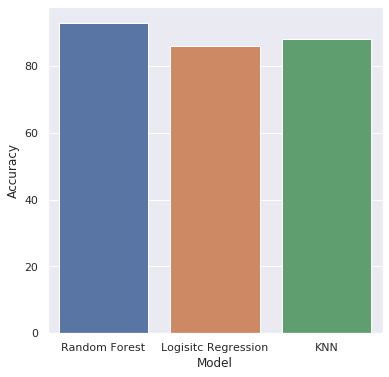

In [46]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)})

ax = sns.barplot(x="Model", y="Accuracy", data=results)